In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
from knn import KNNClassifier
from utils import MNISTUtils, ModelUtils

### =================================

### PCA on mnist dataset

### =================================

In [93]:
# Load Data from mnist dataset
X_train = MNISTUtils.read_mnist_images('data/train-images-idx3-ubyte')
y_train = MNISTUtils.read_mnist_labels('data/train-labels-idx1-ubyte')

X_test = MNISTUtils.read_mnist_images('data/t10k-images-idx3-ubyte')
y_test = MNISTUtils.read_mnist_labels('data/t10k-labels-idx1-ubyte')

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training images shape: (60000, 784)
Training labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


In [94]:
# Apply PCA
print("Applying PCA...")
n_components = 200 # Adjust components here
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {X_train_pca.shape}")

Applying PCA...
Original shape: (60000, 784)
Reduced shape: (60000, 200)


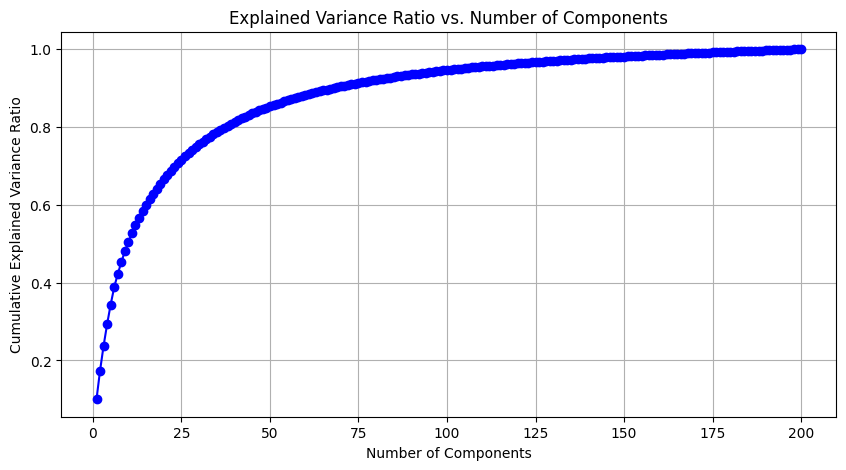

In [95]:
# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()



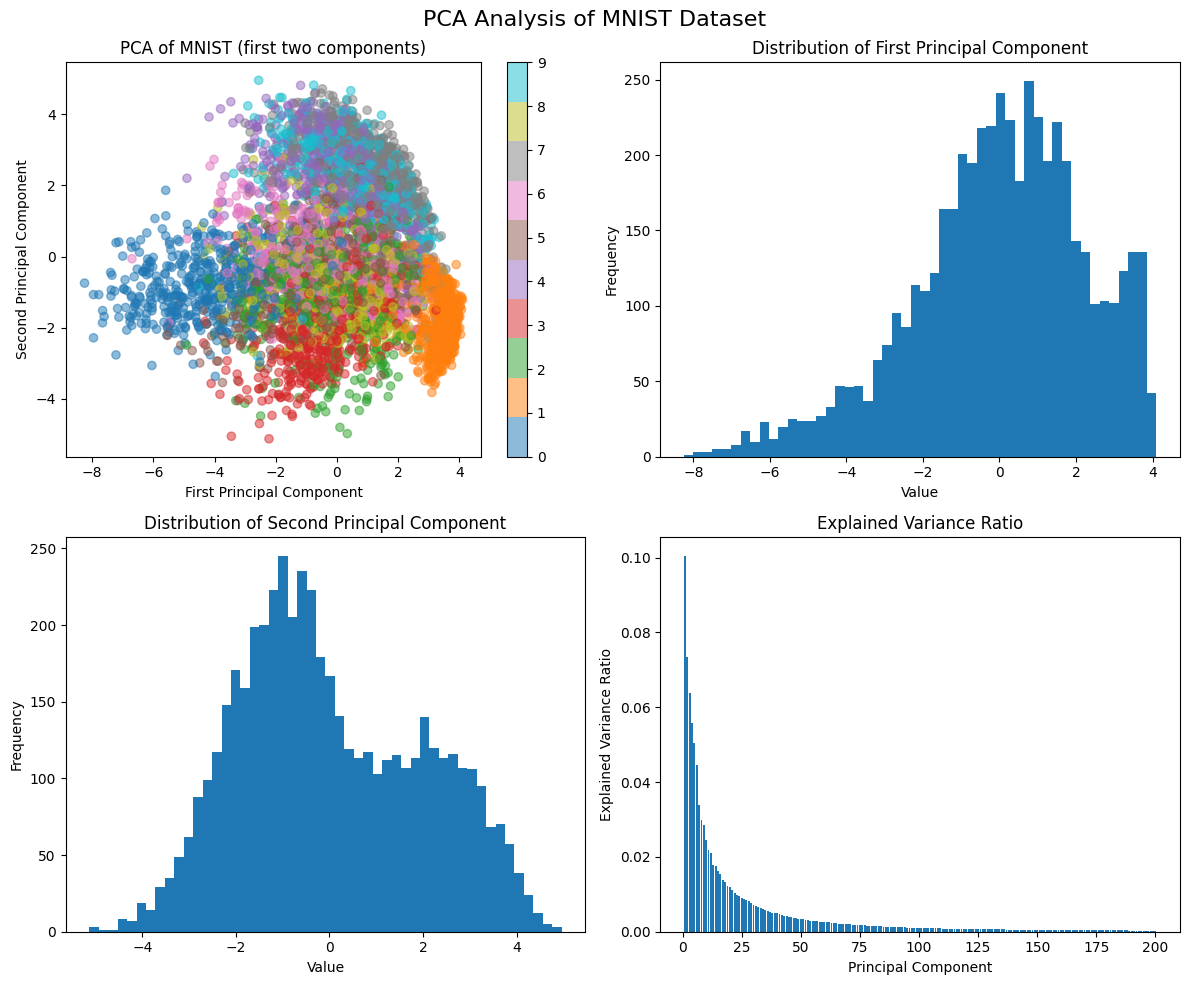

In [96]:
def plot_pca_distribution(X_pca, y):
    plt.figure(figsize=(12, 10))
    plt.suptitle('PCA Analysis of MNIST Dataset', fontsize=16)
    # plt.subplots_adjust(top=0.85)

    # Scatter plot
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('PCA of MNIST (first two components)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

    # Histogram of first principal component
    plt.subplot(2, 2, 2)
    plt.hist(X_pca[:, 0], bins=50)
    plt.title('Distribution of First Principal Component')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Histogram of second principal component
    plt.subplot(2, 2, 3)
    plt.hist(X_pca[:, 1], bins=50)
    plt.title('Distribution of Second Principal Component')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Explained variance ratio
    plt.subplot(2, 2, 4)
    explained_variance_ratio = pca.explained_variance_ratio()
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')

    plt.tight_layout()
    plt.show()

# Plot the results
plot_pca_distribution(X_train_pca[:5000], y_train[:5000])

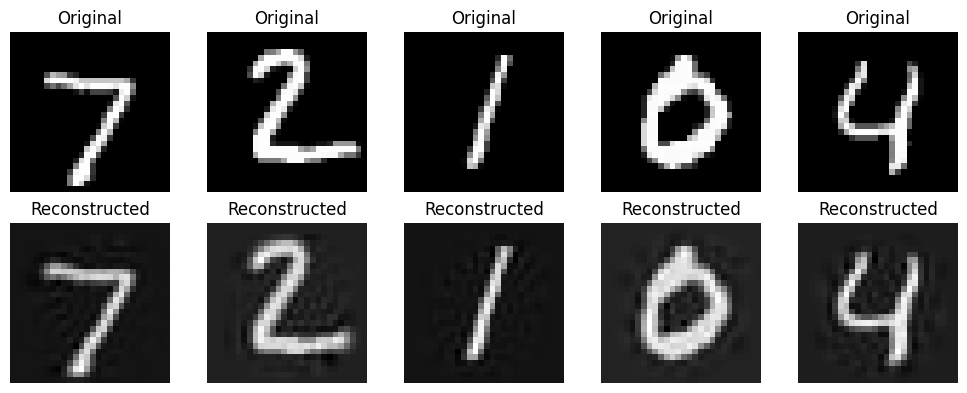

PCA analysis complete!


In [97]:
# Visualize some reconstructed images
n_img = 5
original_img = X_test[:n_img]
reconstructed_img = pca.inverse_transform(X_test_pca[:n_img])

fig, axes = plt.subplots(2, n_img, figsize=(n_img * 2, 4))
for i in range(n_img):
    axes[0, i].imshow(original_img[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # reconstructed_real = np.real(reconstructed_img[i]).reshape(28, 28)
    axes[1, i].imshow(np.real(reconstructed_img[i].reshape(28, 28)), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()

print("PCA analysis complete!")

### =================================

### KNN using PCA-ed mnist dataset

### =================================

In [98]:
# fit pca data
# compare processing time, accuracy, etc

In [99]:
# Split data into smaller portion for traning and test
n_train_data = 10000
n_test_data = 1000
n_random_state = 42

# X_train_pca, X_val_pca, y_train, y_val = ModelUtils.train_test_split(X_train_pca, y_train, train_size=n_train_data/len(X_train_pca), random_state=n_random_state)
# X_test_pca, y_test = X_test_pca[:n_test_data], y_test[:n_test_data]

X_tr_pca, X_val_pca, y_tr, y_val = ModelUtils.train_test_split(X_train_pca, y_train, train_size=n_train_data/len(X_train_pca), random_state=n_random_state)
X_te_pca, y_te = X_test_pca[:n_test_data], y_test[:n_test_data]
print(f"X_train_pca {X_train_pca.shape}")
print(f"y_train {y_train.shape}")
print(f"X_test_pca {X_test_pca.shape}")
print(f"y_test {y_test.shape}")
print(f"X_tr_pca {X_tr_pca.shape}")
print(f"X_te_pca {X_te_pca.shape}")

# print(f"X_train_pca {X_train_pca.shape}")
# print(f"y_train {y_train.shape}")
# print(f"X_test_pca {X_test_pca.shape}")
# print(f"y_test {y_test.shape}")

X_train_pca (60000, 200)
y_train (60000,)
X_test_pca (10000, 200)
y_test (10000,)
X_tr_pca (10000, 200)
X_te_pca (1000, 200)


In [13]:
# Apply KNN classification
print("Applying KNN classification...")
n_neighbors=5
knn = KNNClassifier(n_neighbors=n_neighbors, metric="euclidean")
start_time = time.time()
knn.fit(X_train_pca, y_train)
train_time = time.time() - start_time

Applying KNN classification...


In [14]:
# Make predictions
print("Making predictions...")
start_time = time.time()
y_pred = knn.predict(X_test_pca)
predict_time = time.time() - start_time
print("Predictions done...")

Making predictions...
Predictions done...


Training time: 0.00 seconds
Prediction time: 27.25 seconds
Accuracy: 0.9340
Class 0:
  Precision: 0.9341
  Recall: 1.0000
  F1-score: 0.9659

Class 1:
  Precision: 0.9545
  Recall: 1.0000
  F1-score: 0.9767

Class 2:
  Precision: 0.9901
  Recall: 0.8621
  F1-score: 0.9217

Class 3:
  Precision: 0.9352
  Recall: 0.9439
  F1-score: 0.9395

Class 4:
  Precision: 0.9510
  Recall: 0.8818
  F1-score: 0.9151

Class 5:
  Precision: 0.9011
  Recall: 0.9425
  F1-score: 0.9213

Class 6:
  Precision: 0.9545
  Recall: 0.9655
  F1-score: 0.9600

Class 7:
  Precision: 0.9126
  Recall: 0.9495
  F1-score: 0.9307

Class 8:
  Precision: 0.9494
  Recall: 0.8427
  F1-score: 0.8929

Class 9:
  Precision: 0.8571
  Recall: 0.9574
  F1-score: 0.9045




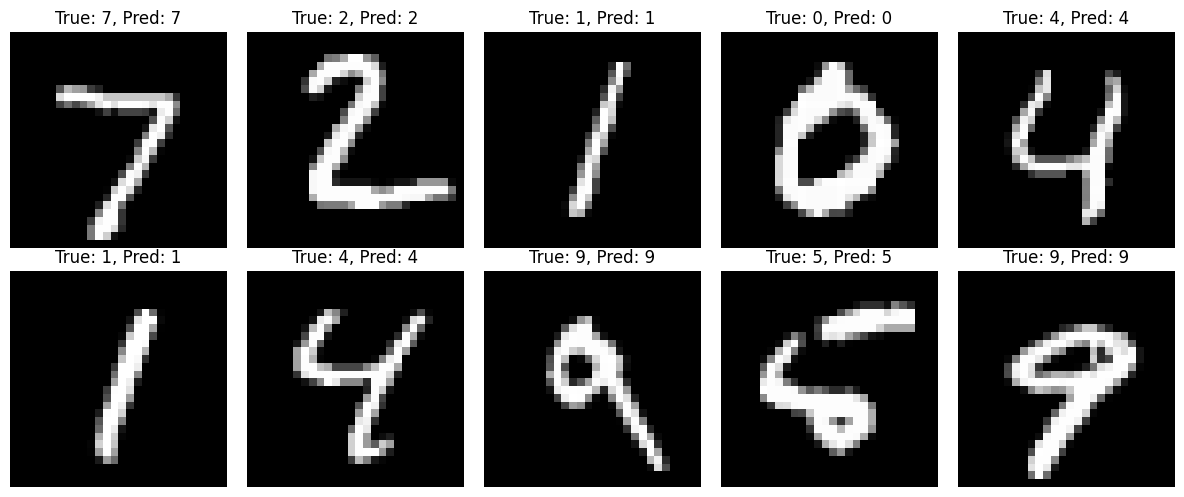

In [15]:
# Calculate accuracy
accuracy = ModelUtils.accuracy_score(y_test, y_pred)
print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {predict_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(ModelUtils.classification_report(y_test, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### =================================

### Try difference PCA 

### =================================

In [100]:
def applyPCA(X_train, y_train, X_test, y_test, n_components=150):
    try:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    
        print(f"Original shape: {X_train.shape}")
        print(f"Reduced shape: {X_train_pca.shape}")
    
        # Visualize explained variance ratio
        explained_variance_ratio = pca.explained_variance_ratio()
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title(f'Explained Variance Ratio vs. Number of Components (n={n_components})')
        plt.grid(True)
        plt.show()
    
        # Visualize some reconstructed images
        n_img = 5
        original_img = X_test[:n_img]
        reconstructed_img = pca.inverse_transform(X_test_pca[:n_img])
        
        fig, axes = plt.subplots(2, n_img, figsize=(n_img * 2, 4))
        for i in range(n_img):
            axes[0, i].imshow(original_img[i].reshape(28, 28), cmap='gray')
            axes[0, i].axis('off')
            axes[0, i].set_title('Original')
        
            # reconstructed_real = np.real(reconstructed_img[i]).reshape(28, 28)
            axes[1, i].imshow(np.real(reconstructed_img[i].reshape(28, 28)), cmap='gray')
            axes[1, i].axis('off')
            axes[1, i].set_title('Reconstructed')
        
        plt.tight_layout()
        plt.show()
        
        print("PCA analysis complete!")
        print(f"\n==============================================================================\n")
    
        return X_train_pca, X_test_pca, pca
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

Original shape: (60000, 784)
Reduced shape: (60000, 10)


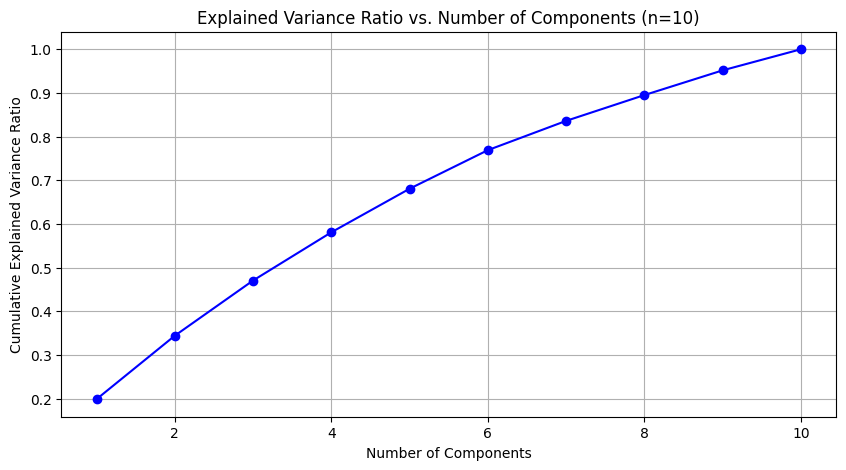

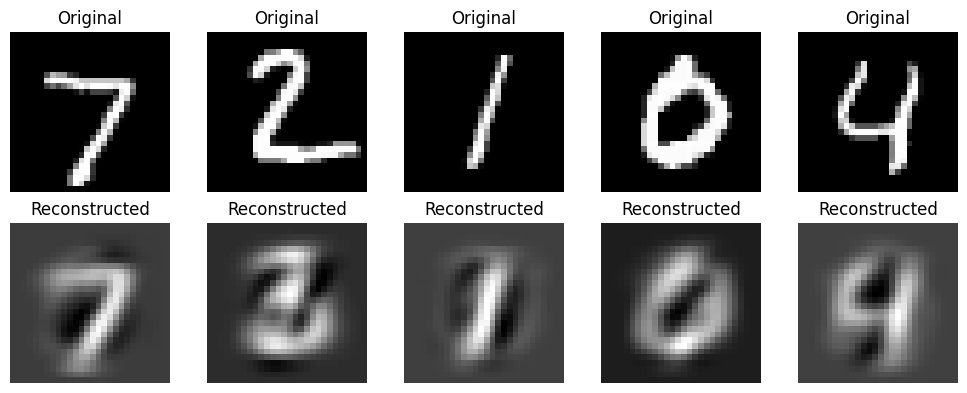

PCA analysis complete!


Original shape: (60000, 784)
Reduced shape: (60000, 200)


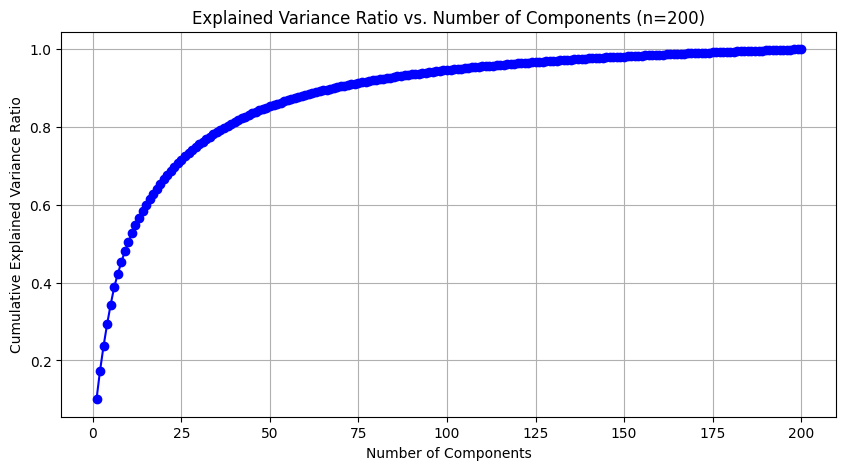

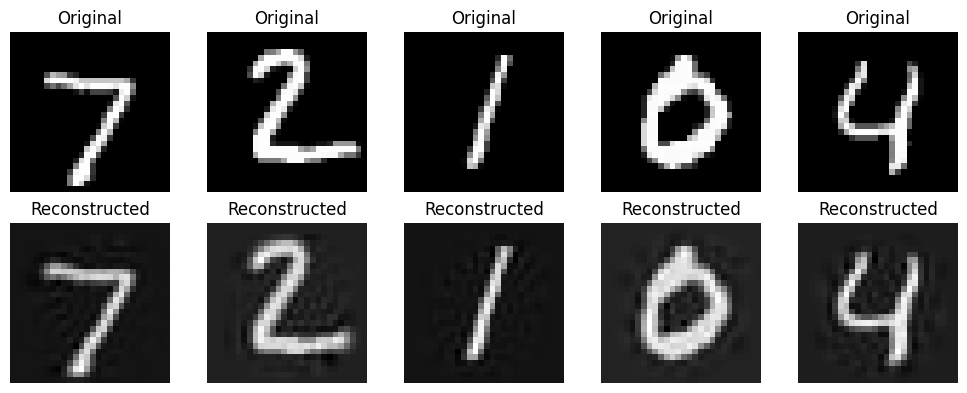

PCA analysis complete!


Original shape: (60000, 784)
Reduced shape: (60000, 500)


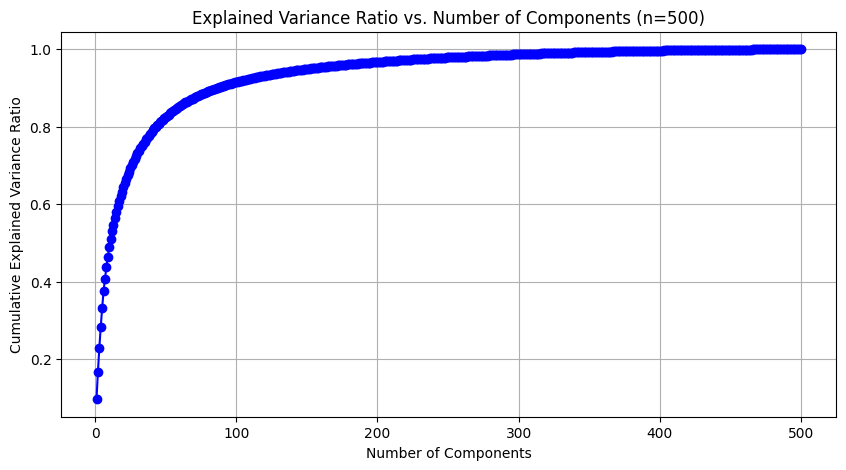

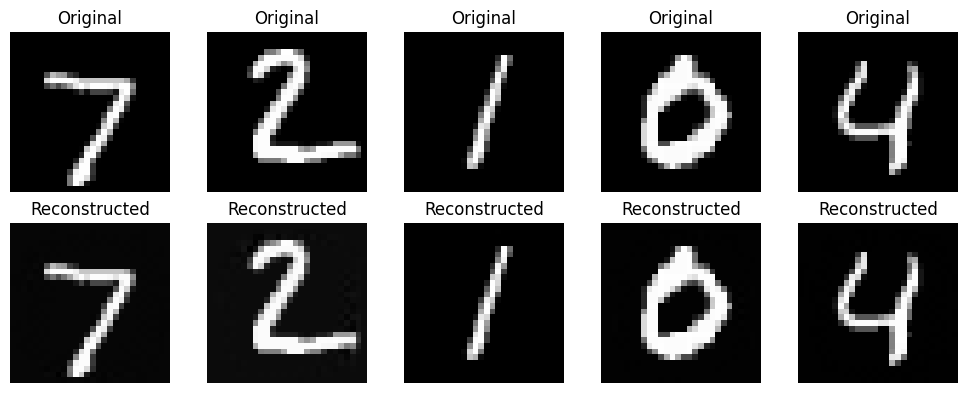

PCA analysis complete!




In [101]:
X_train_10, X_test_10, pca_10 = applyPCA(X_train, y_train, X_test, y_test, n_components=10)
# X_train_50, X_test_50, pca_50 = applyPCA(X_train, y_train, X_test, y_test, n_components=50)
X_train_200, X_test_200, pca_200 = applyPCA(X_train, y_train, X_test, y_test, n_components=200)
# X_train_350, X_test_350, pca_350 = applyPCA(X_train, y_train, X_test, y_test, n_components=350)
X_train_500, X_test_500, pca_500 = applyPCA(X_train, y_train, X_test, y_test, n_components=500)

### =================================
### Apply KNN of PCA dataset
### =================================

In [76]:
def applyKNN(X_train, y_train, X_test, y_test, pca, n_neighbors=5, metric="euclidean", X_test_original=X_test):
    # Apply KNN
    knn = KNNClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)

    # Make predictions
    print(f"Making predictions (k= {n_neighbors} metric={metric})... ")
    start_time = time.time()
    y_pred = knn.predict(X_test)
    predict_time = time.time() - start_time
    print("Predictions done...")

    # Calculate accuracy
    accuracy = ModelUtils.accuracy_score(y_test, y_pred)
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(ModelUtils.classification_report(y_test, y_pred))
    
    # Visualize some predictions
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_original[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    visualize_pca_reconstructions(X_test_original, y_test, y_pred, pca)

    print(f"\n===============================================================\n")

def visualize_pca_reconstructions(X_test, y_test, y_pred, pca, n_samples=10, figsize=(20, 4)):
    """
    Visualize original images, their PCA reconstructions, and predictions.
    
    Parameters:
    - X_test: Original test images
    - y_test: True labels
    - y_pred: Predicted labels
    - pca: Fitted PCA object
    - n_samples: Number of samples to visualize
    - figsize: Figure size
    """
    n_samples = min(n_samples, len(X_test))
    fig, axes = plt.subplots(3, n_samples, figsize=figsize)
    
    for i in range(n_samples):
        original_img = X_test[i].reshape(28, 28)
        reconstructed_img = pca.inverse_transform(pca.transform([X_test[i]])).reshape(28, 28)
        
        # Original image
        axes[0, i].imshow(original_img, cmap='gray')
        axes[0, i].set_title(f"Original")
        axes[0, i].axis('off')
        
        # Reconstructed image
        axes[1, i].imshow(reconstructed_img, cmap='gray')
        axes[1, i].set_title(f"Reconstructed")
        axes[1, i].axis('off')
        
        # Difference image
        diff_img = original_img - reconstructed_img
        axes[2, i].imshow(diff_img, cmap='coolwarm', vmin=-1, vmax=1)
        axes[2, i].set_title(f"Difference")
        axes[2, i].axis('off')
        
        # Add text annotation for true and predicted labels
        axes[0, i].text(0, -2, f"True: {y_test[i]}", ha='left', va='top')
        axes[0, i].text(27, -2, f"Pred: {y_pred[i]}", ha='right', va='top')
        
    plt.suptitle("PCA Image Reconstruction Visualization", fontsize=16)
    plt.tight_layout()
    plt.show()


In [105]:

print(f"X_train_10: {X_train_10.shape}")
print(f"X_test_10: {X_test_10.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_train_200: {X_train_200.shape}")
print(f"X_test_200: {X_test_200.shape}")
print(f"y_test: {y_test.shape}")


X_train_10: (60000, 10)
X_test_10: (10000, 10)
y_train: (60000,)
X_train_200: (60000, 200)
X_test_200: (10000, 200)
y_test: (10000,)


In [119]:
n_train_data = 10000
n_test_data = 1000
n_random_state = 32

Xk_train_10, Xk_val_10, yk_train_10, yk_val_10 = ModelUtils.train_test_split(X_train_10, y_train, train_size=n_train_data/len(X_train_10), random_state=n_random_state)
Xk_test_10, yk_test_10 = X_test_10[:n_test_data], y_test[:n_test_data]

Xk_train_200, Xk_val_200, yk_train_200, yk_val_200 = ModelUtils.train_test_split(X_train_200, y_train, train_size=n_train_data/len(X_train_200), random_state=n_random_state)
Xk_test_200, yk_test_200 = X_test_200[:n_test_data], y_test[:n_test_data]

Xk_train_500, Xk_val_500, yk_train_500, yk_val_500 = ModelUtils.train_test_split(X_train_500, y_train, train_size=n_train_data/len(X_train_500), random_state=n_random_state)
Xk_test_500, yk_test_500 = X_test_500[:n_test_data], y_test[:n_test_data]

In [120]:
print(f"Xk_train_10: {Xk_train_10.shape}")
print(f"Xk_test_10: {Xk_test_10.shape}")
print(f"y_train: {y_train.shape}")
print(f"Xk_train_200: {Xk_train_200.shape}")
print(f"Xk_test_200: {Xk_test_200.shape}")
print(f"y_test: {y_test.shape}")
print(f"Xk_train_500: {Xk_train_500.shape}")
print(f"Xk_test_500: {Xk_test_500.shape}")
print(f"y_test: {y_test_10.shape}")

Xk_train_10: (10000, 10)
Xk_test_10: (1000, 10)
y_train: (60000,)
Xk_train_200: (10000, 200)
Xk_test_200: (1000, 200)
y_test: (10000,)
Xk_train_500: (10000, 500)
Xk_test_500: (1000, 500)
y_test: (1000,)


Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 25.12 seconds
Accuracy: 0.8920
Class 0:
  Precision: 0.9121
  Recall: 0.9765
  F1-score: 0.9432

Class 1:
  Precision: 0.9615
  Recall: 0.9921
  F1-score: 0.9766

Class 2:
  Precision: 0.9381
  Recall: 0.9138
  F1-score: 0.9258

Class 3:
  Precision: 0.9278
  Recall: 0.8411
  F1-score: 0.8824

Class 4:
  Precision: 0.9200
  Recall: 0.8364
  F1-score: 0.8762

Class 5:
  Precision: 0.9136
  Recall: 0.8506
  F1-score: 0.8810

Class 6:
  Precision: 0.9294
  Recall: 0.9080
  F1-score: 0.9186

Class 7:
  Precision: 0.8788
  Recall: 0.8788
  F1-score: 0.8788

Class 8:
  Precision: 0.8043
  Recall: 0.8315
  F1-score: 0.8177

Class 9:
  Precision: 0.7321
  Recall: 0.8723
  F1-score: 0.7961




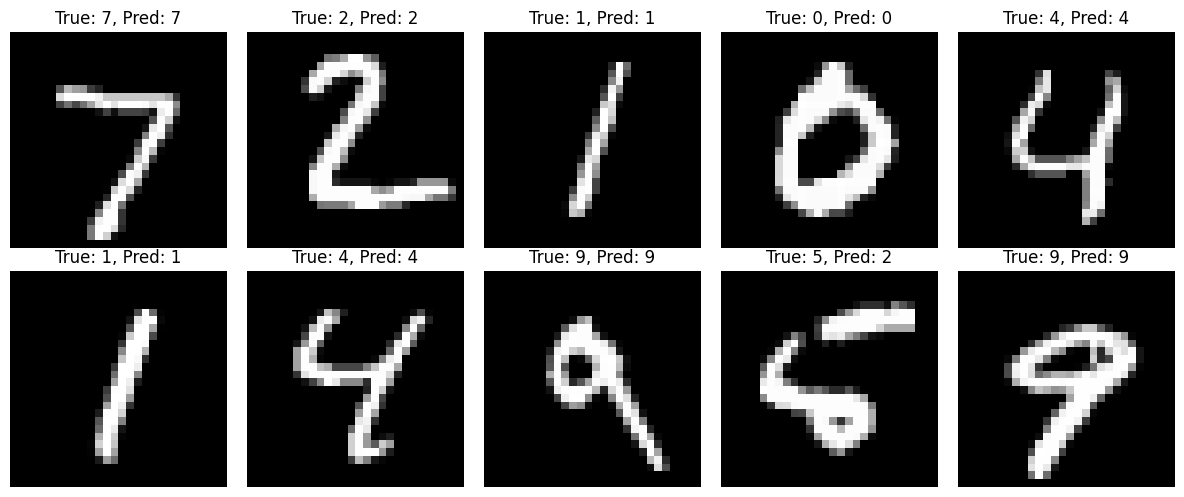

Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 27.34 seconds
Accuracy: 0.9350
Class 0:
  Precision: 0.9239
  Recall: 1.0000
  F1-score: 0.9605

Class 1:
  Precision: 0.9333
  Recall: 1.0000
  F1-score: 0.9655

Class 2:
  Precision: 0.9903
  Recall: 0.8793
  F1-score: 0.9315

Class 3:
  Precision: 0.9524
  Recall: 0.9346
  F1-score: 0.9434

Class 4:
  Precision: 0.9417
  Recall: 0.8818
  F1-score: 0.9108

Class 5:
  Precision: 0.9540
  Recall: 0.9540
  F1-score: 0.9540

Class 6:
  Precision: 0.9651
  Recall: 0.9540
  F1-score: 0.9595

Class 7:
  Precision: 0.8785
  Recall: 0.9495
  F1-score: 0.9126

Class 8:
  Precision: 0.9625
  Recall: 0.8652
  F1-score: 0.9112

Class 9:
  Precision: 0.8627
  Recall: 0.9362
  F1-score: 0.8980




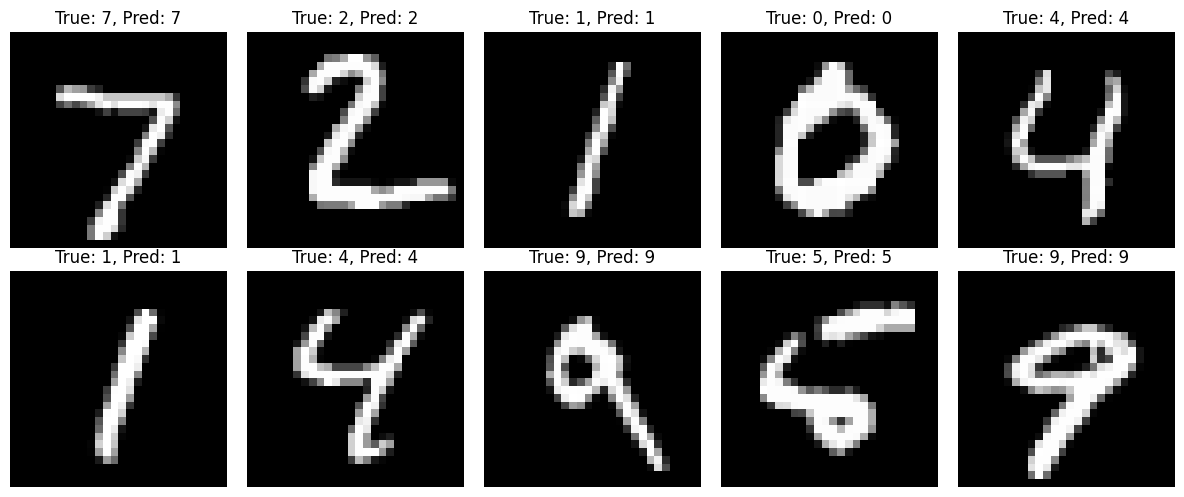

Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 29.34 seconds
Accuracy: 0.9230
Class 0:
  Precision: 0.9239
  Recall: 1.0000
  F1-score: 0.9605

Class 1:
  Precision: 0.9130
  Recall: 1.0000
  F1-score: 0.9545

Class 2:
  Precision: 0.9806
  Recall: 0.8707
  F1-score: 0.9224

Class 3:
  Precision: 0.9333
  Recall: 0.9159
  F1-score: 0.9245

Class 4:
  Precision: 0.9495
  Recall: 0.8545
  F1-score: 0.8995

Class 5:
  Precision: 0.9419
  Recall: 0.9310
  F1-score: 0.9364

Class 6:
  Precision: 0.9540
  Recall: 0.9540
  F1-score: 0.9540

Class 7:
  Precision: 0.8585
  Recall: 0.9192
  F1-score: 0.8878

Class 8:
  Precision: 0.9747
  Recall: 0.8652
  F1-score: 0.9167

Class 9:
  Precision: 0.8286
  Recall: 0.9255
  F1-score: 0.8744




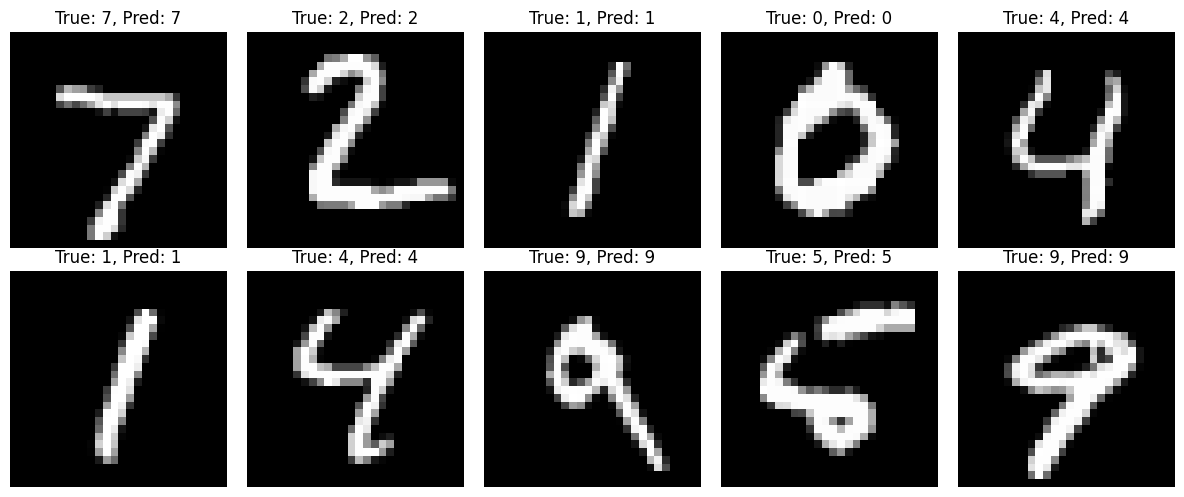

In [121]:
# applyKNN(X_train_10[:10000], y_train[:10000], X_test_10[:10000], y_test[:10000], n_neighbors)
n_neighbors = 5
applyKNN(Xk_train_10, yk_train_10, Xk_test_10, yk_test_10, pca_10, n_neighbors)
applyKNN(Xk_train_200, yk_train_200, Xk_test_200, yk_test_200, pca_200, n_neighbors)
applyKNN(Xk_train_500, yk_train_500, Xk_test_500, yk_test_500, pca_500, n_neighbors)